<a href="https://colab.research.google.com/github/SAB-DataAnalysis/python-proterozoic-visualisation/blob/main/Proterozoic_Python_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

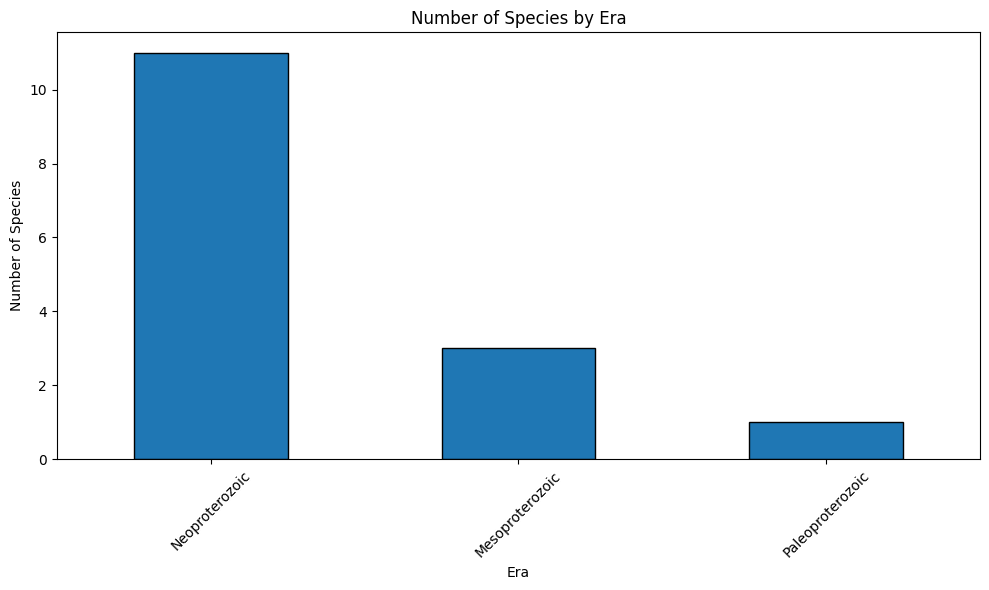

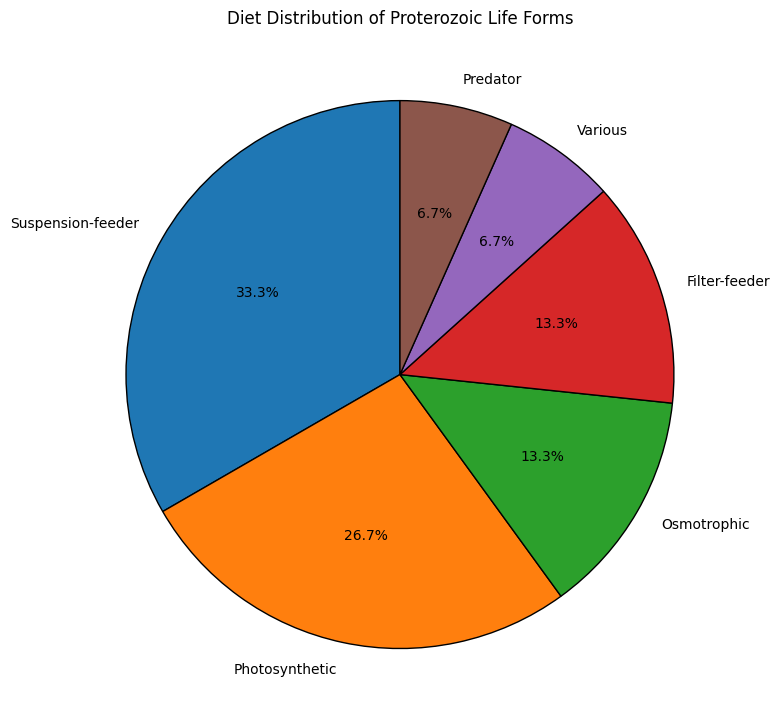

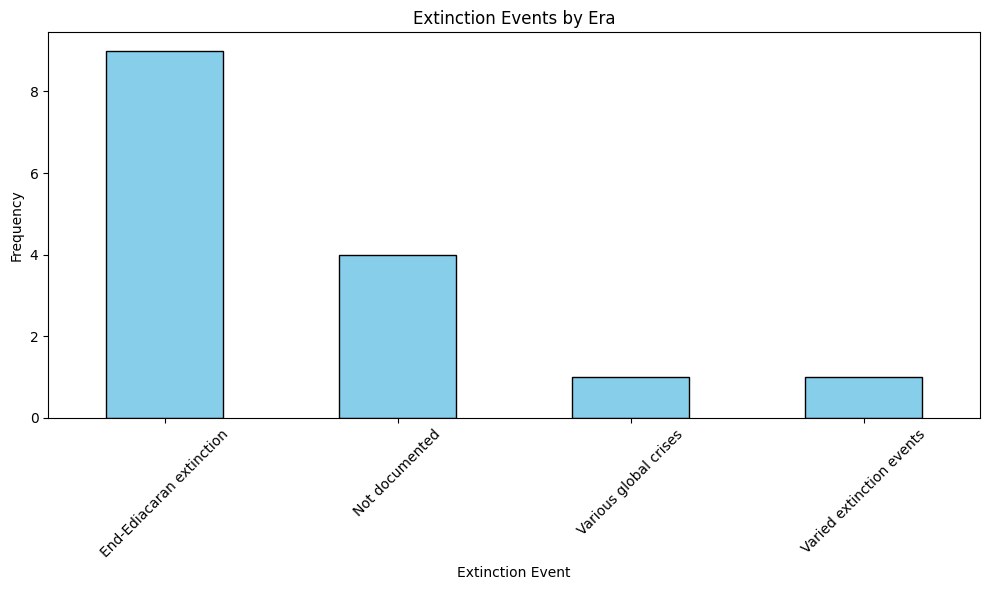

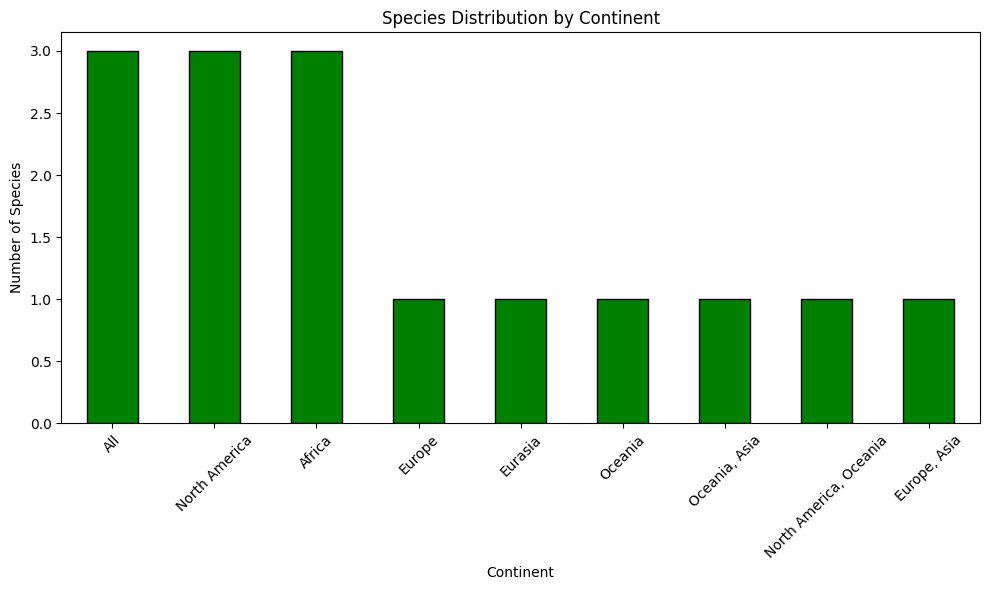

<ipython-input-11-9d2c86840f79>:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  species_counts = species_counts.applymap(lambda x: pd.to_numeric(str(x).split()[0], errors='coerce')).dropna()


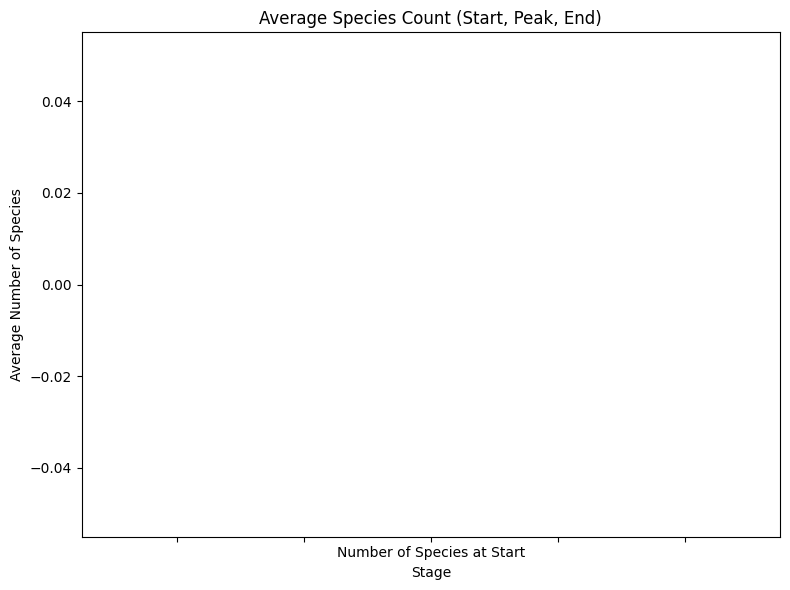

<ipython-input-11-9d2c86840f79>:90: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  'Number of Species at End']].replace(value_mapping).apply(pd.to_numeric, errors='coerce')


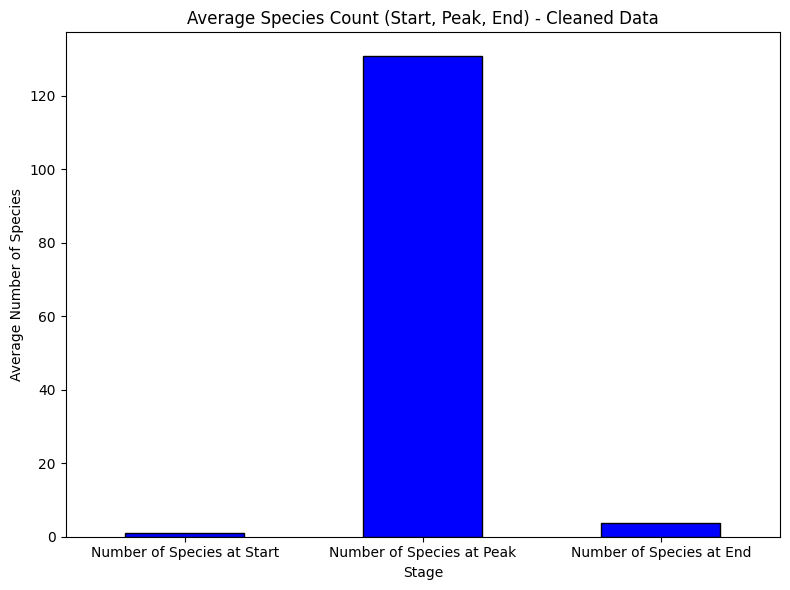

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

new_file_path = '/content/python_project_proterozoic.csv'
new_data = pd.read_csv(new_file_path)

new_data.head()

era_counts = new_data['Era'].value_counts()

#1
plt.figure(figsize=(10, 6))
era_counts.plot(kind='bar', edgecolor='black')
plt.title('Number of Species by Era')
plt.xlabel('Era')
plt.ylabel('Number of Species')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#2
diet_counts = new_data['Diet'].value_counts()

plt.figure(figsize=(8, 8))
diet_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, wedgeprops={'edgecolor': 'black'})
plt.title('Diet Distribution of Proterozoic Life Forms')
plt.ylabel('')  # Remove the default y-axis label
plt.tight_layout()
plt.show()

#3
extinction_events = new_data['Extinction Event'].value_counts()

plt.figure(figsize=(10, 6))
extinction_events.plot(kind='bar', edgecolor='black', color='skyblue')
plt.title('Extinction Events by Era')
plt.xlabel('Extinction Event')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#4
continent_counts = new_data['Continent'].value_counts()

plt.figure(figsize=(10, 6))
continent_counts.plot(kind='bar', color='green', edgecolor='black')
plt.title('Species Distribution by Continent')
plt.xlabel('Continent')
plt.ylabel('Number of Species')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#5
species_counts = new_data[['Number of Species at Start',
                           'Number of Species at Peak',
                           'Number of Species at End']].replace(['Unknown', 'Limited', 'Sparse', 'Decline in Phanerozoic'], pd.NA).dropna()

species_counts = species_counts.applymap(lambda x: pd.to_numeric(str(x).split()[0], errors='coerce')).dropna()

species_counts_mean = species_counts.mean()

plt.figure(figsize=(8, 6))
species_counts_mean.plot(kind='line', marker='o', color='purple')
plt.title('Average Species Count (Start, Peak, End)')
plt.xlabel('Stage')
plt.ylabel('Average Number of Species')
plt.tight_layout()
plt.show()

#6
value_mapping = {
    'Unknown': None,
    'Limited': 1,
    'Sparse': 2,
    'High during Proterozoic': 100,  # Assumed high value for visualization
    'Decline in Phanerozoic': 50,   # Estimated value for decline phase
    'Prolific in Neoproterozoic': 200,  # Assumed prolific value
    'Peak in Mesoproterozoic': 150,
    'Peak in Ediacaran': 120,
    'Extinct': 0
}

# Apply the mapping to convert values to numeric
species_counts_cleaned = new_data[['Number of Species at Start',
                                   'Number of Species at Peak',
                                   'Number of Species at End']].replace(value_mapping).apply(pd.to_numeric, errors='coerce')

# Drop rows with NaN values after conversion
species_counts_cleaned = species_counts_cleaned.dropna()

# Calculate the mean for each stage (Start, Peak, End)
species_counts_mean_cleaned = species_counts_cleaned.mean()

# Improved visualization with cleaned data
plt.figure(figsize=(8, 6))
species_counts_mean_cleaned.plot(kind='bar', color='blue', edgecolor='black')
plt.title('Average Species Count (Start, Peak, End) - Cleaned Data')
plt.xlabel('Stage')
plt.ylabel('Average Number of Species')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()